<a href="https://colab.research.google.com/github/IlhamMalabu/Breast-Cancer-Classification/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Breast Cancer Classification using various machine learning models.**

The aim of this project is to understand the different machine learning models available for classification

### **Imports**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
#Importing Data
df = pd.read_csv('/content/drive/MyDrive/breast_cancer_data.csv')

### **EDA**

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

B    357
M    212
Name: diagnosis, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


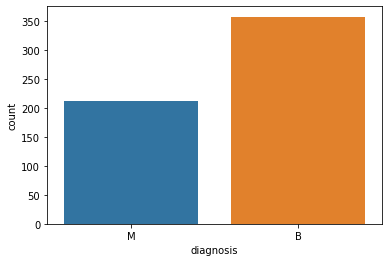

In [6]:
diagnosis = df['diagnosis']
print(diagnosis.value_counts())
ax = sns.countplot(diagnosis, label = "count")


In [7]:
df.shape

(569, 32)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [17]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
diag_dropped = df.drop("diagnosis", axis=1)
diag_dropped.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


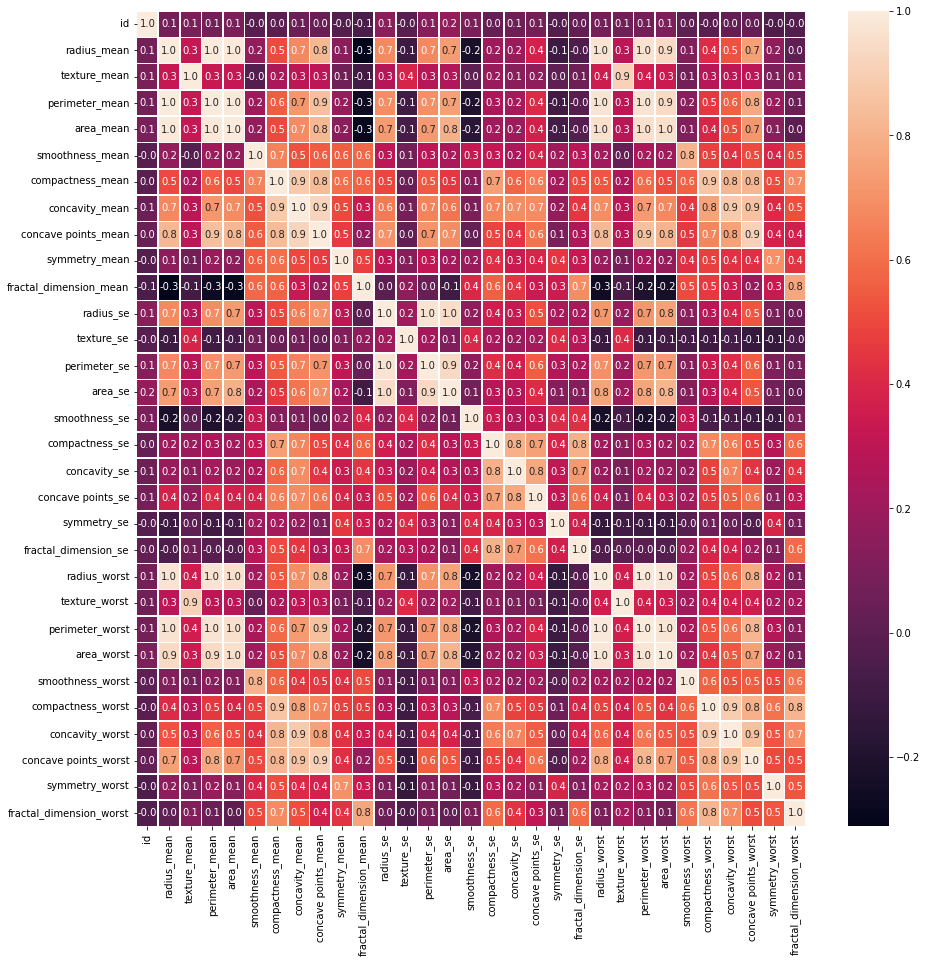

In [12]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(diag_dropped.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax)

### **Preparing Data**

Converting diagnostic values to numerical values using Label Encoder

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [24]:
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

In [25]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **Data Visualization**

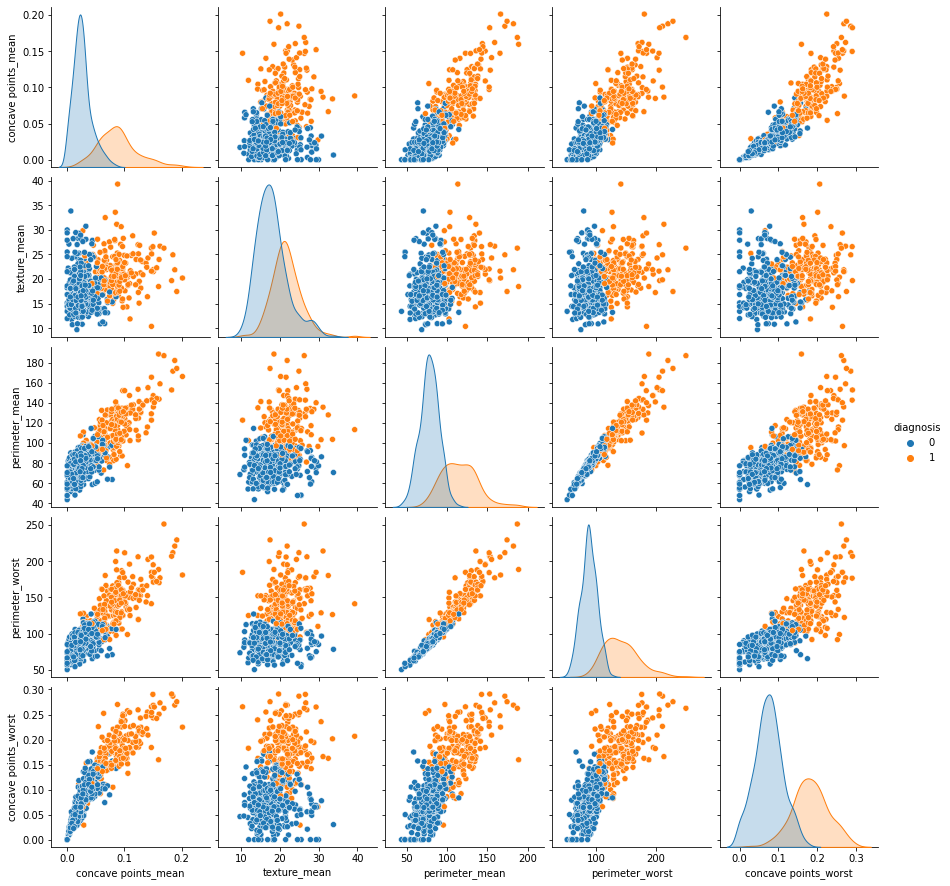

In [26]:
sns.pairplot(df, hue="diagnosis", vars=["concave points_mean", "texture_mean", "perimeter_mean", "perimeter_worst", "concave points_worst"])
plt.show()

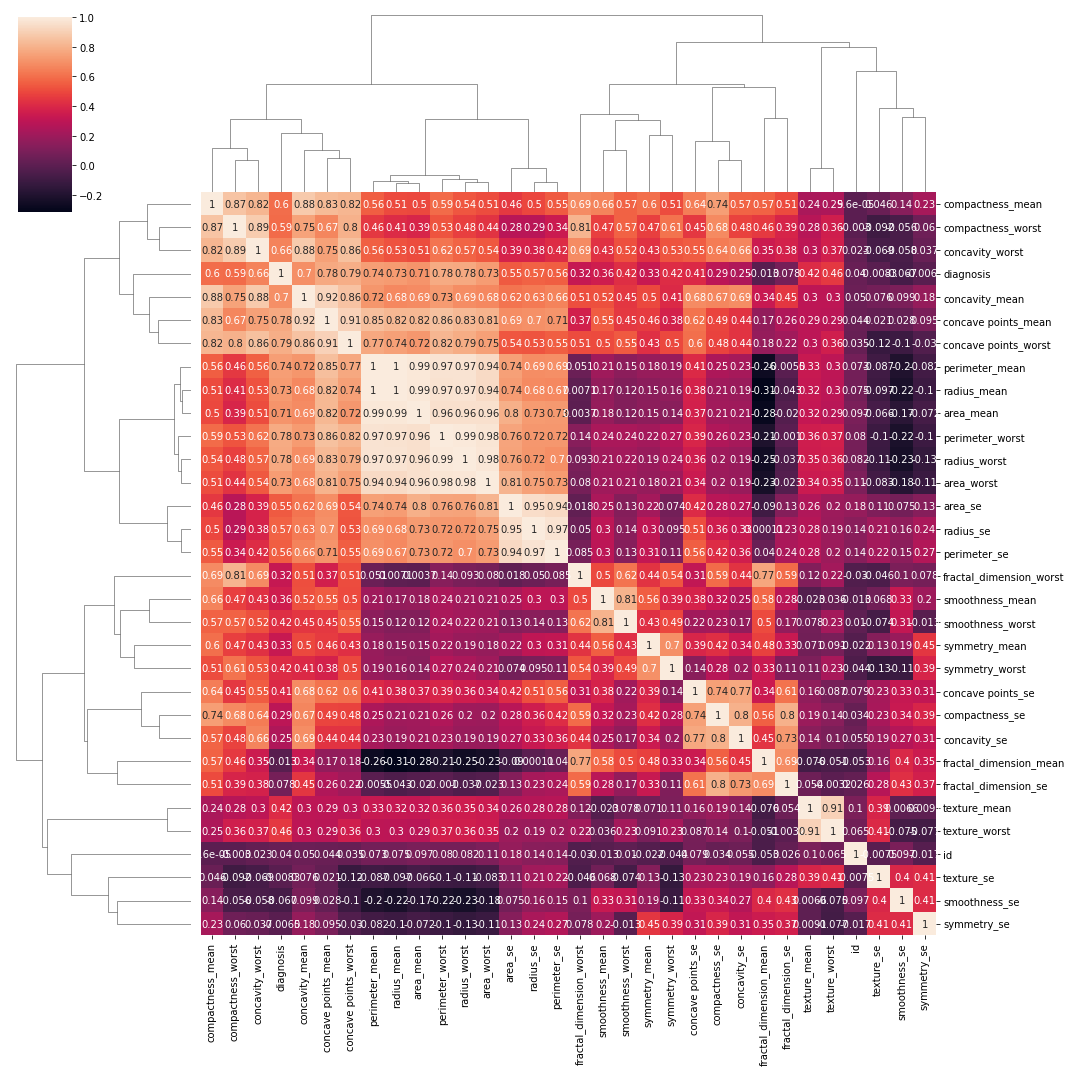

In [29]:
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, figsize=(15,15))
plt.show()

In [31]:
#using threshold to explore highly correlated features
threshold = 0.75
filter = np.abs(corr_matrix['diagnosis']) > threshold
corr_features = corr_matrix.columns[filter].tolist()
corr_features

['diagnosis',
 'concave points_mean',
 'radius_worst',
 'perimeter_worst',
 'concave points_worst']

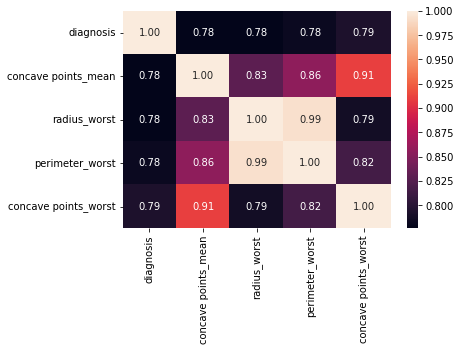

In [32]:
#features which are highly correlated 
sns.heatmap(df[corr_features].corr(), annot = True, fmt = '.2f')
plt.show()

### **Splitting Data into Train and Test**

In [34]:
y = df.diagnosis.values
x_data = df.drop(["diagnosis"],axis=1)
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))
x.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=42)

### **Logistic Regression**

In [36]:
lr = LogisticRegression(random_state = 1) #We are building our model
lr.fit(x_train,y_train) #We are training our model
print("Print accuracy of Logistic Regression Classifier: {}".format(lr.score(x_test,y_test)))
lr_acc_score = lr.score(x_test,y_test)

Print accuracy of Logistic Regression Classifier: 0.9766081871345029


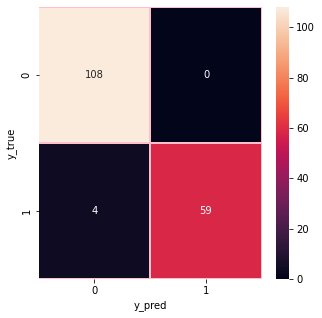

In [58]:
y_pred = lr.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="pink",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### **K Neighbors Classifier**

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
print("Print accuracy of K Neighbors Classifier algo: {}".format(knn.score(x_test,y_test)))
knn_acc_score = knn.score(x_test,y_test)

Print accuracy of K Neighbors Classifier algo: 0.9649122807017544


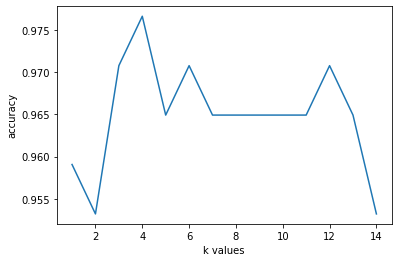

In [39]:
score_list = []
for each in range(1,15):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
#visualize
plt.plot(range(1,15),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.savefig('plot')
plt.show()

From the plot we can see that the best K value is 4.

In [40]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)
print("Test accuracy {}".format(knn.score(x_test,y_test)))

Test accuracy 0.9766081871345029


This gave us higher accuracy

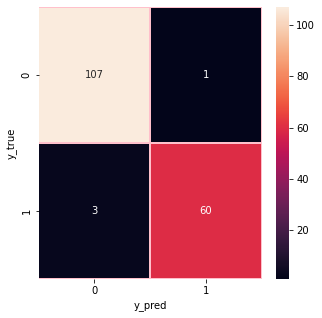

In [57]:
y_pred = knn.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="pink",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### **Naive Bayes**

In [42]:
nb = GaussianNB()       
nb.fit(x_train,y_train) 
print("Print accuracy of naive bayes algo: {}".format(nb.score(x_test,y_test)))
nb_acc_score = nb.score(x_test,y_test)



Print accuracy of naive bayes algo: 0.935672514619883


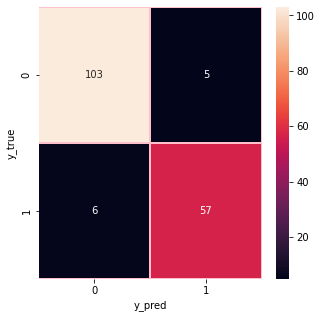

In [56]:
y_pred = nb.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="pink",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### **Support Vector Machine (SVM)**

In [44]:
svm = SVC()   #We are building our model
svm.fit(x_train,y_train)      #We are training our model
print("Print accuracy of svm algo: ",svm.score(x_test,y_test))
svm_acc_score = svm.score(x_test,y_test)

Print accuracy of svm algo:  0.9824561403508771


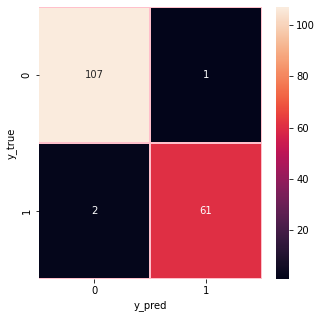

In [55]:
y_pred = svm.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="pink",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



### **Decision Tree Classifier**

In [46]:
dt = DecisionTreeClassifier(random_state = 1)   #We are building our model
dt.fit(x_train,y_train)       #We are training our model
print("Print accuracy of Decision Tree Classifier algo: ",dt.score(x_test,y_test))
dt_acc_score = dt.score(x_test,y_test)

Print accuracy of Decision Tree Classifier algo:  0.9415204678362573


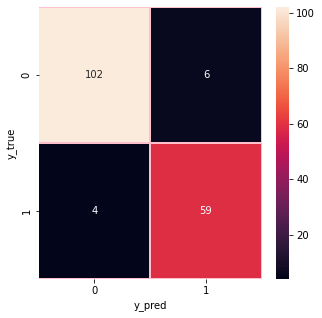

In [54]:
y_pred = dt.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="pink",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



### **Random Forest Classifier**

In [49]:
rf = RandomForestClassifier(n_estimators=10,random_state=1)
rf.fit(x_train,y_train)
print("Print accuracy of Random Forest Classifier algo: ",rf.score(x_test,y_test))
rf_acc_score = rf.score(x_test,y_test)

Print accuracy of Random Forest Classifier algo:  0.9532163742690059


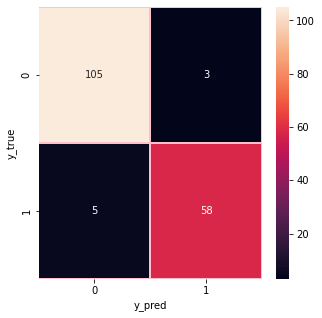

In [52]:
y_pred = rf.predict(x_test)
y_true = y_test

cm = confusion_matrix(y_true, y_pred)

#visualize
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot = True, linewidths=0.5,linecolor="pink",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### **Evaluating the Models**

In [51]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','Naive Bayes','Support Vector Machine','Decision Tree','Random Forest'], 
                         'Accuracy': [lr_acc_score*100,knn_acc_score*100,nb_acc_score*100,svm_acc_score*100,dt_acc_score*100,rf_acc_score*100]})
model_ev



,Model,Accuracy
0,Logistic Regression,97.660819
1,K-Nearest Neighbour,96.491228
2,Naive Bayes,93.567251
3,Support Vector Machine,98.245614
4,Decision Tree,94.152047
5,Random Forest,95.321637


From above, we can see that SVM had the highest accuracy score.